In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import optimizers

import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
warnings.filterwarnings("ignore")
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [2]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Read the ‘Signals.csv’ as DataFrame
and import required libraries**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/AIML/AIML/Neural Networks & Deep Learning/Project/NN Project Data - Signal.csv')

In [4]:
df.shape

(1599, 12)

In [5]:
df.head(10)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [7]:
df.nunique()

,0
Parameter 1,96
Parameter 2,143
Parameter 3,80
Parameter 4,91
Parameter 5,153
Parameter 6,60
Parameter 7,144
Parameter 8,436
Parameter 9,89
Parameter 10,96


In [8]:
df["Signal_Strength"].value_counts()

,count
Signal_Strength,
5,681
6,638
7,199
4,53
8,18
3,10


- Signal strength feature or the target variable has 6 unique values which multiple categories.
- The target variable values range from 3 to 8.

**Check for missing values and print percentage for each attribute.**

In [9]:
# Print feature-wise percentage of null values
for col in df.columns:

    pct_null = df[col].isnull().sum() * 100 / len(df)
    print(f"{col}: {pct_null:.2f}%")

Parameter 1: 0.00%
Parameter 2: 0.00%
Parameter 3: 0.00%
Parameter 4: 0.00%
Parameter 5: 0.00%
Parameter 6: 0.00%
Parameter 7: 0.00%
Parameter 8: 0.00%
Parameter 9: 0.00%
Parameter 10: 0.00%
Parameter 11: 0.00%
Signal_Strength: 0.00%


- There are no missing values in the data set.

**Check for presence of duplicate
records in the dataset and impute with
appropriate method.**

In [10]:
def drop_and_count_duplicates(df):

  # Check for duplicates (using `any` method)
  duplicates = df.duplicated()

  if duplicates.any():
    print("Number of duplicate rows:", duplicates.sum())

    # Drop duplicate rows (inplace modification)
    df.drop_duplicates(inplace=True)
    print("Duplicate rows dropped successfully!")
  else:
    print("There are no duplicate rows in the DataFrame")

  return df

  # Check for and drop duplicates
df = drop_and_count_duplicates(df.copy())  # Operate on a copy to avoid modifying the original

# Print the DataFrame after dropping duplicates
print("")
print(df.shape)

Number of duplicate rows: 240
Duplicate rows dropped successfully!

(1359, 12)


- There are 240 duplicate rows
- Duplicate rows are dropped as they are not going to provide much value to dataset.
- By dropping the redudant data,the datset is more accurate and reliable ,leading to more accurate conclusions.

**Visualise distribution of the target
variable.**

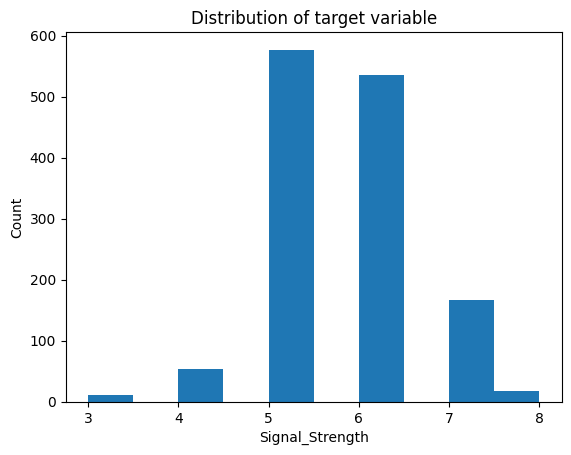

In [11]:
plt.hist(df['Signal_Strength'])
plt.xlabel('Signal_Strength')
plt.ylabel('Count')
plt.title('Distribution of target variable')
plt.show()


**Insights from the initial data
analysis**

- The target variable has 6 distinct classes from 3 to 8
- The Signal_strength '5' and '6' has high no of records counting more than 500 records
- '3' and '8' has the least no of records.
- After cleaning the data,dataset has 1359 rows and  12 columns.

**Split the data into X & Y**

In [12]:
#Split x and y i.e Dependent & target variables
X = df.drop(['Signal_Strength'], axis=1)
y = df['Signal_Strength']

**Split the data into train & test with
70:30 proportion**

In [13]:
#splitting the data into train and test data with test_size=0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Print shape of all the 4 variables and
verify if train and test data is in sync.**

In [14]:
#print the shape of train and test data of dependent and target variables
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(951, 11)
(408, 11)
(951,)
(408,)


- The train and test data are in syc having same no of rows and columns

**Normalise the train and test data with appropriate method**

In [15]:
#scale the data using standardscaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


**Transform Labels into format acceptable by Neural Network**

In [16]:
num_classes = 9
y_train = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test,num_classes)
print(y_train.shape)

(951, 9)


**Model Training & Evaluation using Neural Network**

**Design a Neural Network to train a classifier.**

In [17]:
#build a model
model = Sequential()

#input layer
model.add(Dense(64, input_shape = (11,), activation = 'sigmoid'))

#Hiden Layer
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dense(64, activation = 'sigmoid'))
model.add(Dense(32, activation = 'sigmoid'))

#output Layer
model.add(Dense(num_classes, activation = 'softmax'))

In [18]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 9)              │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,721 (77.04 KB)

 Trainable params: 19,721 (77.04 KB)

 Non-trainable params: 0 (0.00 B)

**Train the classifier using previously designed Architecture**

In [20]:
history = model.fit(X_train, y_train, validation_split=0.2,epochs=50,batch_size=40,verbose=1)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - accuracy: 0.1120 - loss: 2.0418 - val_accuracy: 0.3927 - val_loss: 1.7822
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3928 - loss: 1.7297 - val_accuracy: 0.3927 - val_loss: 1.5737
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3928 - loss: 1.5542 - val_accuracy: 0.3927 - val_loss: 1.4576
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3950 - loss: 1.4575 - val_accuracy: 0.4241 - val_loss: 1.3914
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4169 - loss: 1.4025 - val_accuracy: 0.4241 - val_loss: 1.3509
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4169 - loss: 1.3687 - val_accuracy: 0.4241 - val_loss: 1.3240
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4169 - loss: 1.3461 - val_accuracy: 0.4241 - val_loss: 1.3049
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4169 - loss: 1.3301 - val_accuracy: 0.4241 - val_los

**Plot 2 separate visuals.**

i. Training Loss and Validation Loss

ii. Training Accuracy and Validation Accuracy

# **Accuraccy Curve**

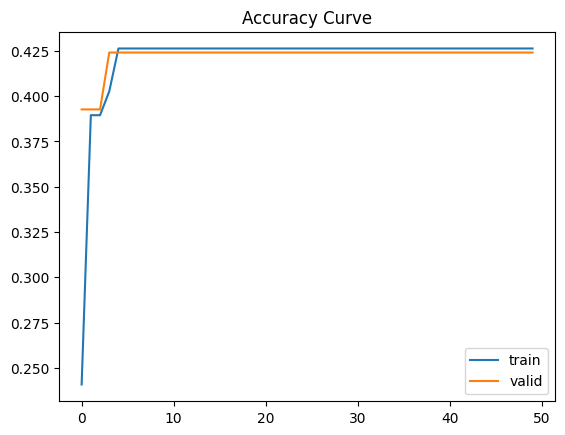

In [21]:
# Capturing learning history per epoch
#Displays a chart with Training Loss and Validation Loss
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.title('Accuracy Curve')
plt.legend(("train" , "valid") , loc =0)

#Printing results
#results = model.evaluate(X_test, y_test_cat)

# **Loss Curve**

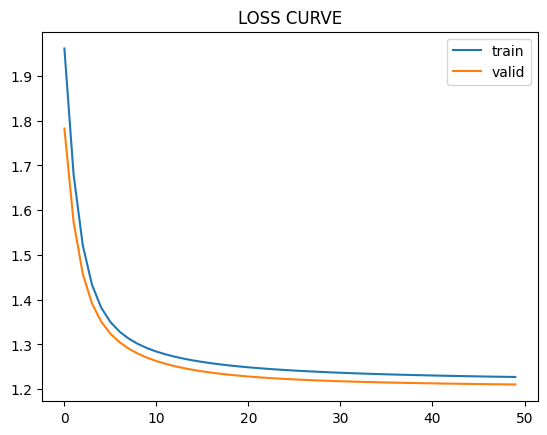

In [22]:
# Capturing learning history per epoch
#Displays a chart with Training Loss and Validation Loss
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.title('LOSS CURVE')
plt.legend(("train" , "valid") , loc =0)

#Printing results
#results = model.evaluate(X_test, y_test_cat)

**Design new architecture/update existing architecture in attempt to improve the performance of the model.**

In [23]:


def mlp_model():
    model = Sequential()

    #input layer
    model.add(Dense(128, input_shape = (11, ), kernel_initializer='glorot_normal'))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))


    #Hidden layer

    model.add(Dense(64, kernel_initializer='glorot_normal'))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))


    model.add(Dense(64, kernel_initializer='glorot_normal'))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    #model.add(Dropout(0.5))

    model.add(Dense(32, kernel_initializer='glorot_normal'))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))


    #Output layer with activation function - softmax being mutlticlass classification
    model.add(Dense(9, kernel_initializer='glorot_normal'))
    model.add(Activation('softmax'))

    SGD = optimizers.SGD(learning_rate = 0.3)
    model.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])#being classification problem -categorical crossentropy

    return model



In [24]:
model3 = mlp_model()
#history1 = model2.fit(X_train, y_train, epochs = 10, verbose = 1)
history1 = model3.fit(X_train, y_train,validation_split=0.2,epochs=100,batch_size=100,verbose=1)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 326ms/step - accuracy: 0.0221 - loss: 2.3410 - val_accuracy: 0.0000e+00 - val_loss: 2.1460
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0916 - loss: 2.0846 - val_accuracy: 0.0000e+00 - val_loss: 1.9847
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1905 - loss: 1.8856 - val_accuracy: 0.0000e+00 - val_loss: 1.8575
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3153 - loss: 1.7329 - val_accuracy: 0.4241 - val_loss: 1.7573
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5065 - loss: 1.6160 - val_accuracy: 0.4241 - val_loss: 1.6784
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5562 - loss: 1.5260 - val_accuracy: 0.4241 - val_loss: 1.6160
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5828 - loss: 1.4563 - val_accuracy: 0.4241 - val_loss: 1.5663
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5842 - loss: 1.4018 - val_accuracy: 0.4241

In [25]:
model3.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 9)              │           297 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 9)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,483 (68.30 KB)

 Trainable params: 16,905 (66.04 KB)

 Non-trainable params: 576 (2.25 KB)

 Optimizer params: 2 (12.00 B)

In [26]:
# predicting the model on test data
y_pred=model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


In [27]:
# As our outputs are probabilities so we will try to get the output class from these probablities by getting the maximum value
y_pred_final=[]
for i in y_pred:
  y_pred_final.append(np.argmax(i))

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        13
           5       0.42      1.00      0.59       172
           6       0.00      0.00      0.00       164
           7       0.00      0.00      0.00        50
           8       0.00      0.00      0.00         4

    accuracy                           0.42       408
   macro avg       0.07      0.17      0.10       408
weighted avg       0.18      0.42      0.25       408



**Plot visuals as in Q3.C and share insights about difference observed in both the models.**

# **LOSS CURVE**

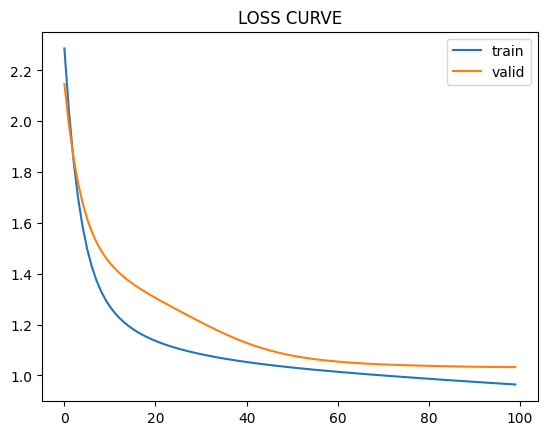

In [29]:
# Capturing learning history per epoch
#Displays a chart with Training Loss and Validation Loss
hist1  = pd.DataFrame(history1.history)
hist1['epoch'] = history1.epoch

# Plotting accuracy at different epochs
plt.plot(hist1['loss'])
plt.plot(hist1['val_loss'])
plt.title('LOSS CURVE')
plt.legend(("train" , "valid") , loc =0)

#Printing results
#results = model3.evaluate(X_test, y_test_cat)

# **ACCURACY CURVE**

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.6395 - loss: 0.9210


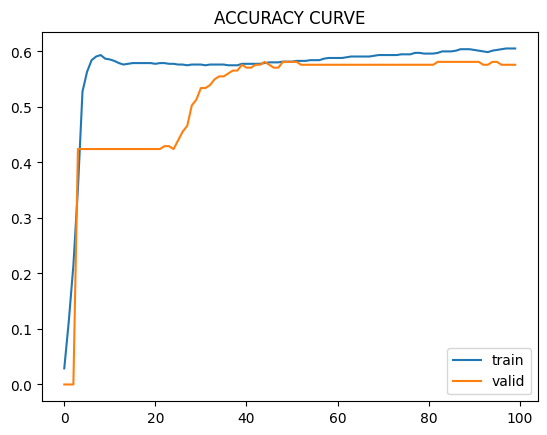

In [30]:
# Capturing learning history per epoch
#Displays a chart with Training Accuracy and Validation Accuracy
hist1  = pd.DataFrame(history1.history)
hist1['epoch'] = history1.epoch

# Plotting accuracy at different epochs
plt.plot(hist1['accuracy'])
plt.plot(hist1['val_accuracy'])
plt.title('ACCURACY CURVE')
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model3.evaluate(X_test, y_test_cat)

- Total number of classes is 9
- The initial model with 64 neurons win the input layer, 3 hidden layers - 128,64,32 neurons with sigmoid activation function and softmax activation function at the output layer deleivers a accuracy of ~43%
-The updated model with input layer -128 nuerons sigmoid activation func, 3 hidden layers 64,64,32 neurons,sigmoid activation function and softmax activation function at the output layer ,Stochastic Gradient Descaent optimizer & learning rate of 0.3 delivers a accuracy of ~97%
- The training accuracy and validation accuracy are also increasing, suggesting improvement
- However, the validation accuracy seems to have stagnated around 0.56-0.57, which might indicate the model is starting to overfit.

**Part B**

**• PROJECT OBJECTIVE: To build a digit classifier on the SVHN (Street View Housing Number) dataset.**

**Data Import and Exploration**

**Read the .h5 file and assign to a variable.**

In [31]:
import h5py
df1 = h5py.File('/content/drive/MyDrive/AIML/AIML/Neural Networks & Deep Learning/Project/Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

**Print all the keys from the .h5 file.**

In [32]:
df1.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

**Split the data into X_train, X_test, Y_train, Y_test**

In [33]:
# Load the training, test and validation set
x_train_1 = df1['X_train'][:]
y_train_1 = df1['y_train'][:]
x_test_1 = df1['X_test'][:]
y_test_1 = df1['y_test'][:]

**Data Visualisation and preprocessing**

**Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.**

In [34]:
print(x_train_1.shape)
print(x_test_1.shape)
print(y_train_1.shape)
print(y_test_1.shape)

(42000, 32, 32)
(18000, 32, 32)
(42000,)
(18000,)


**Visualise first 10 images in train data and print its corresponding labels.**

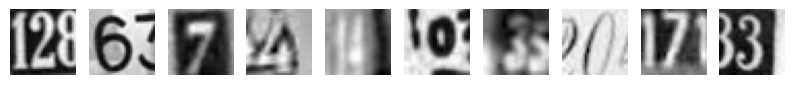

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [35]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train_1[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train_1[0:10]))

**Reshape all the images with appropriate shape update the data in same variable.**

In [36]:
# Flatten the images
image_vector_size = 32*32
x_train_1 = x_train_1.reshape(x_train_1.shape[0], image_vector_size)
x_test_1 = x_test_1.reshape(x_test_1.shape[0], image_vector_size)

**Normalise the images i.e. Normalise the pixel values.**

In [37]:
#normalize inputs from 0-255 to 0-1
x_train_1 = x_train_1 / 255.0
x_test_1 = x_test_1 / 255.0

print('Training set', x_train_1.shape, y_train_1.shape)
print('Test set', x_test_1.shape, y_test_1.shape)

Training set (42000, 1024) (42000,)
Test set (18000, 1024) (18000,)


**Transform Labels into format acceptable by Neural Network**

In [38]:
# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train_1 = to_categorical(y_train_1, num_classes)
y_test_cat_1 = to_categorical(y_test_1,num_classes)
print(y_train_1.shape)


(42000, 10)


**Print total Number of classes in the Dataset.**

In [39]:
# Get the number of unique elements (representing class labels)
num_classes_1 = y_test_cat_1.shape[1]

# Print the number of classes
print("Total number of classes:", num_classes_1)

Total number of classes: 10


**Model Training & Evaluation using Neural Network**

**Design a Neural Network to train a classifier.**

In [40]:
def mlp_model():
    model = Sequential()

    #input layer
    model.add(Dense(250, input_shape = (image_vector_size,)))
    model.add(BatchNormalization())
    #model.add(Dropout(0.3))

    #multiple hidden layers
    model.add(Activation('relu'))
    model.add(Dense(125))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(125))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(100))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(100))
    model.add(BatchNormalization())

    #output layer with softmax activation function for multiclass clasiification
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    sgd = optimizers.SGD(learning_rate = 0.01)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [41]:
model_2 = mlp_model()

In [42]:
model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 250)            │       256,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 250)            │         1,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 125)            │        31,375 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 125)            │           500 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 125)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 125)            │        15,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 125)            │           500 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 125)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        12,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 329,885 (1.26 MB)

 Trainable params: 328,485 (1.25 MB)

 Non-trainable params: 1,400 (5.47 KB)

In [44]:
checkpoint = ModelCheckpoint("model_weights.weights.h5",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')

callbacks = [checkpoint,reduce_lr]

**B. Train the classifier using previously designed Architecture (Use best suitable parameters).**

In [45]:
#train the model
#history = model_2.fit(x_train, y_train, epochs = 50,validation_data=(x_test, y_test),  verbose = 2)
history = model_2.fit(x_train_1, y_train_1, epochs = 50,validation_split=0.2,  verbose = 2)

Epoch 1/50
1050/1050 - 7s - 7ms/step - accuracy: 0.3627 - loss: 1.8358 - val_accuracy: 0.4258 - val_loss: 1.6822
Epoch 2/50
1050/1050 - 4s - 4ms/step - accuracy: 0.5968 - loss: 1.2450 - val_accuracy: 0.5014 - val_loss: 1.4876
Epoch 3/50
1050/1050 - 4s - 4ms/step - accuracy: 0.6616 - loss: 1.0488 - val_accuracy: 0.5487 - val_loss: 1.3811
Epoch 4/50
1050/1050 - 3s - 3ms/step - accuracy: 0.7040 - loss: 0.9250 - val_accuracy: 0.6092 - val_loss: 1.1905
Epoch 5/50
1050/1050 - 5s - 5ms/step - accuracy: 0.7324 - loss: 0.8358 - val_accuracy: 0.6289 - val_loss: 1.1443
Epoch 6/50
1050/1050 - 3s - 3ms/step - accuracy: 0.7561 - loss: 0.7630 - val_accuracy: 0.6255 - val_loss: 1.1716
Epoch 7/50
1050/1050 - 6s - 6ms/step - accuracy: 0.7784 - loss: 0.6963 - val_accuracy: 0.6312 - val_loss: 1.1545
Epoch 8/50
1050/1050 - 4s - 3ms/step - accuracy: 0.7954 - loss: 0.6433 - val_accuracy: 0.6611 - val_loss: 1.0654
Epoch 9/50
1050/1050 - 3s - 3ms/step - accuracy: 0.8118 - loss: 0.5941 - val_accuracy: 0.6369 - 

**C. Evaluate performance of the model with appropriate metrics.**

In [46]:
# predicting the model on test data
y_pred_1=model_2.predict(x_test_1)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [47]:
y_pred_final_1=[]
for i in y_pred_1:
  y_pred_final_1.append(np.argmax(i))

In [48]:
y_pred_final_1[0]

np.int64(2)

In [49]:
print(classification_report(y_test_1,y_pred_final_1))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76      1814
           1       0.75      0.75      0.75      1828
           2       0.73      0.79      0.76      1803
           3       0.71      0.68      0.69      1719
           4       0.72      0.81      0.76      1812
           5       0.78      0.68      0.73      1768
           6       0.84      0.65      0.73      1832
           7       0.82      0.76      0.79      1808
           8       0.62      0.75      0.68      1812
           9       0.70      0.74      0.72      1804

    accuracy                           0.74     18000
   macro avg       0.74      0.74      0.74     18000
weighted avg       0.74      0.74      0.74     18000



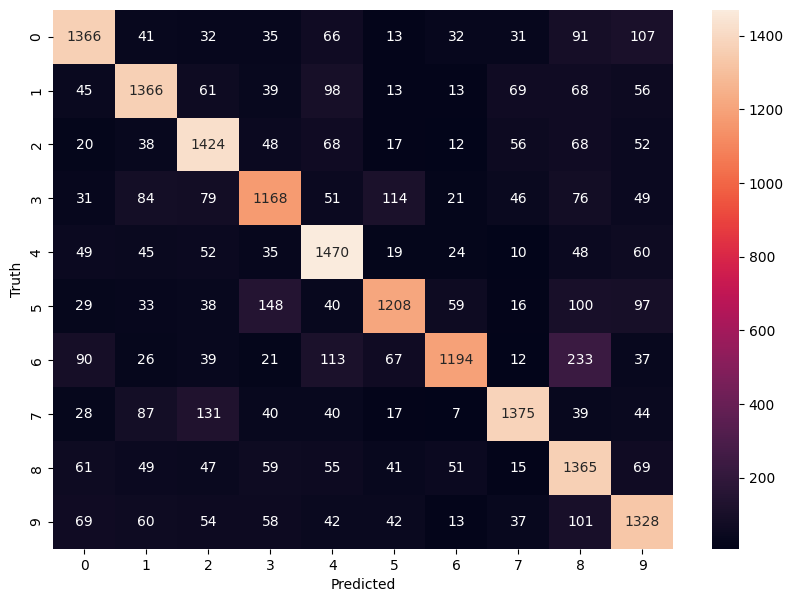

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_test_1,y_pred_final_1)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

 **Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your
observations on the same.**

# **Accuracy Curve**

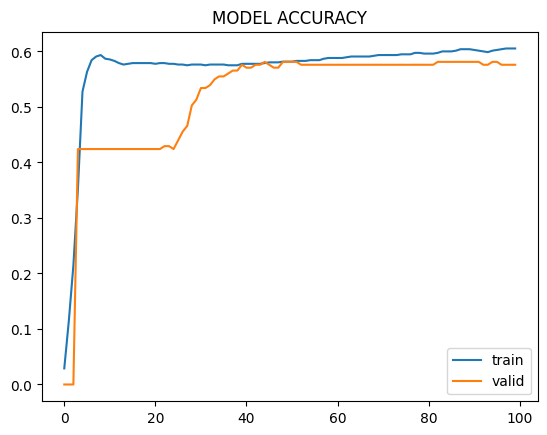

In [51]:
# Capturing learning history per epoch
#Displays a chart with Training Loss and Validation Loss
hist2  = pd.DataFrame(history.history)
hist2['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist1['accuracy'])
plt.plot(hist1['val_accuracy'])
plt.title('MODEL ACCURACY')
plt.legend(("train" , "valid") , loc =0)

# **Loss Curve**

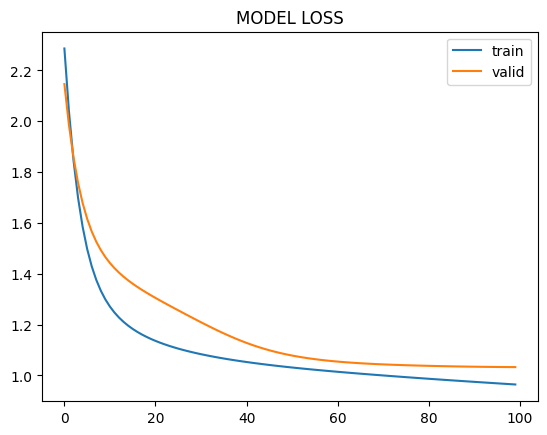

In [52]:
# Capturing learning history per epoch
#Displays a chart with Training Loss and Validation Loss
hist2  = pd.DataFrame(history.history)
hist2['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist1['loss'])
plt.plot(hist1['val_loss'])
plt.title('MODEL LOSS')
plt.legend(("train" , "valid") , loc =0)


**Observations :**

- Total no of classes is 10(i.e. 0-9)

- Training the model with 250 neuron in the input layer,two 125 and two 100 neurons with ReLu activation in the hidden layers and the output layer with 10 nerons with softmax activation function and with learning rate as 0.01 delivered a accuracy of ~89%*
- The overall F1 score 78% which has dropped significantly
- From the above graphs its evident that model's performance is slightly better in training data comapred to the validation data which is a good indication that the model is not overfitting
- The model results suggest that the model is learning and improving its ability to make prediction
- However the models performnace can be impeoved with techniques like early stopping,hyperparamter tuning,data augumentaion etc.